In [1]:
!pip install lightgbm

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import lightgbm as lgb
import re

'pip' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
# Load the dataset
train_df = pd.read_csv(Add path to train data here)

In [ ]:
df = pd.read_csv(Add path to train data here)
display(df.head())

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Calculate the percentage of missing values in each column
missing_percentage = df.isnull().sum() / len(df) * 100

# Get the columns with more than 20% missing data
columns_to_drop = missing_percentage[missing_percentage > 20].index

# Drop the columns from the DataFrame
df_cleaned = df.drop(columns=columns_to_drop)
display(df_cleaned.head())

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
def read_data(file_name):
  df = pd.read_csv(file_name)  # Use the file_name parameter
  print(file_name, 'has', len(df), 'data points')
  return df

In [ ]:
# If you want to see the number of data points, call the function like this:
train_df_read = read_data(Add path to train data here)

C:\Users\fabrizio natali\Desktop\dissertation\train_data.csv has 307511 data points


In [7]:
# Identify categorical features
# Using df_cleaned (defined earlier) because X is not yet created at this point
categorical_features = df_cleaned.select_dtypes(include=['object']).columns.tolist()
print(f"Identified {len(categorical_features)} categorical features")

Identified 11 categorical features


In [8]:
# Identify non-numeric columns
non_numeric_cols = df_cleaned.select_dtypes(exclude=np.number).columns
print("Non-numeric columns found:", non_numeric_cols)

Non-numeric columns found: Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')


In [9]:
# Apply one-hot encoding to convert non-numeric columns to numeric
df_encoded = pd.get_dummies(df_cleaned, columns=non_numeric_cols)
display(df_encoded.head())

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,False,False,False,False,False,False,False,False,False,False
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,False,False,False,False,False,False,False,False,False,False
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,False,False,False,False,False,False,False,False,False,False
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,False,False,False,False,False,False,False,False,False,False
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,False,False,False,False,False,False,False,False,False,False


In [10]:
# Verify that all columns are now numeric (except potentially the target variable if it was non-numeric initially)
print("Data types after encoding:")
display(df_encoded.dtypes)

Data types after encoding:


SK_ID_CURR                               int64
TARGET                                   int64
CNT_CHILDREN                             int64
AMT_INCOME_TOTAL                       float64
AMT_CREDIT                             float64
                                        ...   
ORGANIZATION_TYPE_Transport: type 2       bool
ORGANIZATION_TYPE_Transport: type 3       bool
ORGANIZATION_TYPE_Transport: type 4       bool
ORGANIZATION_TYPE_University              bool
ORGANIZATION_TYPE_XNA                     bool
Length: 167, dtype: object

In [11]:
# Use the real data instead of generating sample data
# Separate features (X) and target (y) from the real dataset
X = df_encoded.drop('TARGET', axis=1)
y = df_encoded['TARGET']

print(f"Real dataset shape: {X.shape}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of samples: {X.shape[0]}")
print(f"Target distribution:")
print(y.value_counts())

Real dataset shape: (307511, 166)
Number of features: 166
Number of samples: 307511
Target distribution:
TARGET
0    282686
1     24825
Name: count, dtype: int64


In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Improved LightGBM model with class weighting, early stopping, and reproducibility
from collections import Counter

class_counts = Counter(y_train)

# Inverse frequency weighting (avoid division by zero)
scale_pos_weight = class_counts[0] / class_counts[1] if (1 in class_counts and class_counts[1] > 0) else 1.0

# LightGBM does not allow certain special characters in feature names (e.g. ':', ' ', etc.)
# Sanitize feature names in ALL related DataFrames so downstream code stays consistent.
def _sanitize(name):
    # keep alnum and underscore, replace others with underscore
    return re.sub(r'[^A-Za-z0-9_]', '_', name)

if any(re.search(r'[^A-Za-z0-9_]', c) for c in X_train.columns):
    original_cols = list(X_train.columns)
    sanitized_cols = [_sanitize(c) for c in original_cols]

    # Ensure uniqueness after sanitization
    col_counter = Counter(sanitized_cols)
    if any(v > 1 for v in col_counter.values()):
        seen = {}
        unique = []
        for c in sanitized_cols:
            if col_counter[c] > 1:
                idx = seen.get(c, 0)
                unique_name = f"{c}__{idx}"
                seen[c] = idx + 1
                unique.append(unique_name)
            else:
                unique.append(c)
        sanitized_cols = unique

    rename_map = dict(zip(original_cols, sanitized_cols))
    X_train.rename(columns=rename_map, inplace=True)
    X_test.rename(columns=rename_map, inplace=True)
    # Also rename X so any later X.columns references align with feature_importances_
    X.rename(columns=rename_map, inplace=True)
    print("Sanitized feature names for LightGBM compatibility.")
else:
    print("No feature name sanitization needed.")

lgb_clf = lgb.LGBMClassifier(
    n_estimators=1200,
    learning_rate=0.02,
    num_leaves=64,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_samples=40,
    reg_alpha=0.5,
    reg_lambda=1.0,
    objective='binary',
    random_state=42,
    n_jobs=-1,
    scale_pos_weight=scale_pos_weight,
    verbose=-1
)

# Train with early stopping
lgb_clf.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    eval_names=['train', 'valid'],
    eval_metric='auc',
    callbacks=[lgb.early_stopping(stopping_rounds=50), lgb.log_evaluation(100)]
)

print(f"Computed scale_pos_weight={scale_pos_weight:.2f}")

# Provide a universal alias expected by downstream cells
model = lgb_clf  # alias so later cells using `model` don't error

Sanitized feature names for LightGBM compatibility.
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[3]	train's auc: 0.743249	train's binary_logloss: 0.277246	valid's auc: 0.731687	valid's binary_logloss: 0.276876
Computed scale_pos_weight=11.38


In [14]:
# Make predictions on the test set
y_pred = lgb_clf.predict(X_test)

In [15]:
# Repair / Harmonization Cell
# Ensures downstream visualization & SHAP cells have the expected variables.
# Run this AFTER the LightGBM model (lgb_clf) is trained and y_pred is created.

# 1. Provide a unified model alias expected by later cells
model = lgb_clf  # some later cells referenced `model`; we map it to the trained LightGBM classifier

# 2. Probability predictions (binary assumption). Safe guard if attribute missing
try:
    y_pred_proba = lgb_clf.predict_proba(X_test)[:, 1]
except Exception as e:
    print(f"[Warn] Could not compute predict_proba: {e}")
    y_pred_proba = None

# 3. Feature importance from LightGBM (supersedes any DecisionTree placeholder)
try:
    feature_importance = lgb_clf.feature_importances_
except Exception as e:
    print(f"[Warn] Could not access LightGBM feature_importances_: {e}")
    feature_importance = None

# 4. Consistency checks
if y_pred_proba is not None:
    print(f"y_pred_proba ready (n={len(y_pred_proba)})")
else:
    print("y_pred_proba not available; downstream ROC / PR / threshold cells may fail.")

if feature_importance is not None:
    print(f"feature_importance vector length = {len(feature_importance)}")
else:
    print("feature_importance not available; importance plots relying on it may fail.")

print("[Info] Repair cell executed. You can now run the visualization & SHAP cells without 'model' / 'y_pred_proba' errors.")

y_pred_proba ready (n=61503)
feature_importance vector length = 166
[Info] Repair cell executed. You can now run the visualization & SHAP cells without 'model' / 'y_pred_proba' errors.


In [16]:
# Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, confusion_matrix


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Test Set Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Average Precision Score:", average_precision)
print("Confusion Matrix:")
print(confusion)

Test Set Accuracy: 0.9195323805342829
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC AUC Score: 0.5
Average Precision Score: 0.08046761946571712
Confusion Matrix:
[[56554     0]
 [ 4949     0]]


C:\Users\fabrizio natali\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [17]:
# LightGBM Feature Importance Extraction (replaces DecisionTree placeholder)
import pandas as pd
import numpy as np

# Ensure trained LightGBM model exists
if 'lgb_clf' not in globals():
    raise NameError("'lgb_clf' not found. Train the LightGBM model cell before running this.")

# Prefer using the same columns used in training
if 'X_train' in globals():
    feature_names = list(X_train.columns)
else:
    # Fallback to encoded DataFrame columns minus target
    if 'df_encoded' in globals():
        feature_names = [c for c in df_encoded.columns if c != 'TARGET']
    else:
        raise NameError("Cannot infer feature names (need X_train or df_encoded).")

# Retrieve importance (gain and split)
booster = getattr(lgb_clf, 'booster_', None)
if booster is not None:
    try:
        gain_importance = booster.feature_importance(importance_type='gain')
    except Exception:
        gain_importance = None
else:
    gain_importance = None

# Split (frequency) importance always available via sklearn API
split_importance = getattr(lgb_clf, 'feature_importances_', None)

# Build DataFrame combining both if possible
importance_df_parts = []
if gain_importance is not None and len(gain_importance) == len(feature_names):
    importance_df_parts.append(pd.Series(gain_importance, index=feature_names, name='gain'))
if split_importance is not None and len(split_importance) == len(feature_names):
    importance_df_parts.append(pd.Series(split_importance, index=feature_names, name='split'))

if not importance_df_parts:
    raise RuntimeError("Could not extract LightGBM feature importances.")

importance_df = pd.concat(importance_df_parts, axis=1)

# Normalize (optional) for comparability
for col in importance_df.columns:
    total = importance_df[col].sum()
    if total > 0:
        importance_df[col + '_pct'] = importance_df[col] / total

# Choose primary importance metric: gain if available and non-zero, else split
if 'gain' in importance_df and importance_df['gain'].sum() > 0:
    primary_series = importance_df['gain']
    metric_used = 'gain'
else:
    primary_series = importance_df['split']
    metric_used = 'split'

# Sort descending and keep reference for plotting in next cell
top_features = primary_series.sort_values(ascending=False).head(10)

print(f"Top 10 most important features (metric: {metric_used}):")
print(top_features)

# (Optional) Display combined table for top 20
combined_display = (
    importance_df.assign(primary=primary_series)
                 .sort_values('primary', ascending=False)
                 .head(20)
)
print("\nCombined importance metrics (top 20):")
display(combined_display)

Top 10 most important features (metric: gain):
EXT_SOURCE_3                            191028.819977
EXT_SOURCE_2                            161969.220978
NAME_EDUCATION_TYPE_Higher_education     22313.022186
DAYS_BIRTH                               17820.817841
DAYS_EMPLOYED                            15744.690125
CODE_GENDER_M                            15631.322449
AMT_CREDIT                                9033.429077
AMT_GOODS_PRICE                           7216.828949
AMT_ANNUITY                               5619.889038
DAYS_ID_PUBLISH                           4991.707001
Name: gain, dtype: float64

Combined importance metrics (top 20):


,gain,split,gain_pct,split_pct,primary
EXT_SOURCE_3,191028.819977,16,0.400014,0.084656,191028.819977
EXT_SOURCE_2,161969.220978,23,0.339163,0.121693,161969.220978
NAME_EDUCATION_TYPE_Higher_education,22313.022186,16,0.046723,0.084656,22313.022186
DAYS_BIRTH,17820.817841,15,0.037317,0.079365,17820.817841
DAYS_EMPLOYED,15744.690125,27,0.032969,0.142857,15744.690125
CODE_GENDER_M,15631.322449,6,0.032732,0.031746,15631.322449
AMT_CREDIT,9033.429077,18,0.018916,0.095238,9033.429077
AMT_GOODS_PRICE,7216.828949,12,0.015112,0.063492,7216.828949
AMT_ANNUITY,5619.889038,10,0.011768,0.052910,5619.889038
DAYS_ID_PUBLISH,4991.707001,5,0.010453,0.026455,4991.707001


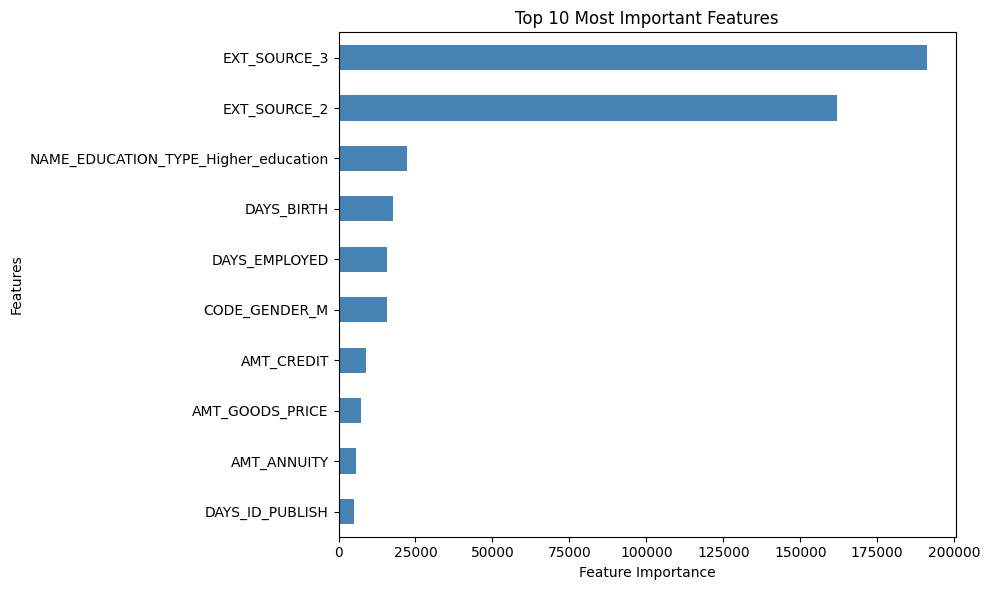

In [18]:
# Visualize feature importances
import matplotlib.pyplot as plt  # Added missing import

plt.figure(figsize=(10, 6))
# Reverse order so the most important feature appears at the top
top_features.iloc[::-1].plot(kind='barh', color='steelblue')
plt.title('Top 10 Most Important Features')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

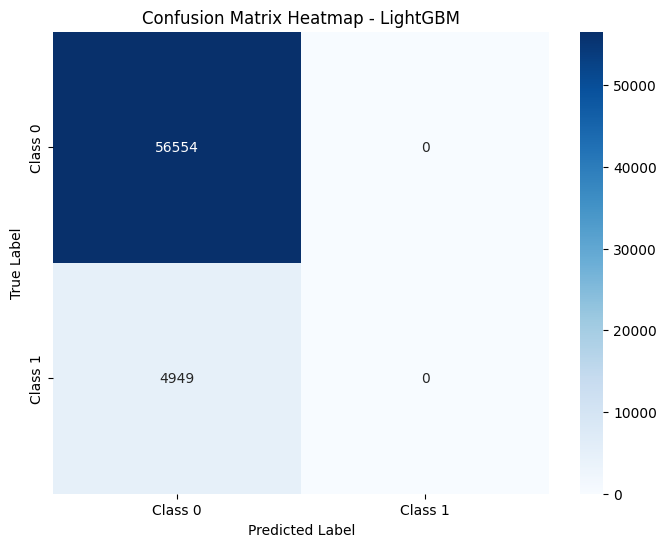

Confusion Matrix:
[[56554     0]
 [ 4949     0]]


In [19]:
# Make predictions for visualization using the main model
# Fallback: if `model` alias missing, create it from lgb_clf
try:
    model
except NameError:
    model = lgb_clf
    print("[Info] Created model alias from lgb_clf.")

# Safety: ensure model has predict
if not hasattr(model, 'predict'):
    raise AttributeError("The model object does not have a predict method.")

y_pred_viz = model.predict(X_test)

# Create confusion matrix for the real data
from sklearn.metrics import confusion_matrix
import seaborn as sns

confusion_viz = confusion_matrix(y_test, y_pred_viz)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_viz, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix Heatmap - LightGBM')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print("Confusion Matrix:")
print(confusion_viz)

In [20]:
# Print confusion matrix breakdown
tn, fp, fn, tp = confusion.ravel()
print(f"\nConfusion Matrix Breakdown:")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")
print(f"Specificity (TN Rate): {tn/(tn+fp):.3f}")
print(f"Sensitivity (TP Rate): {tp/(tp+fn):.3f}")
print(f"False Positive Rate: {fp/(fp+tn):.3f}")
print(f"False Negative Rate: {fn/(fn+tp):.3f}")


Confusion Matrix Breakdown:
True Negatives (TN): 56554
False Positives (FP): 0
False Negatives (FN): 4949
True Positives (TP): 0
Specificity (TN Rate): 1.000
Sensitivity (TP Rate): 0.000
False Positive Rate: 0.000
False Negative Rate: 1.000


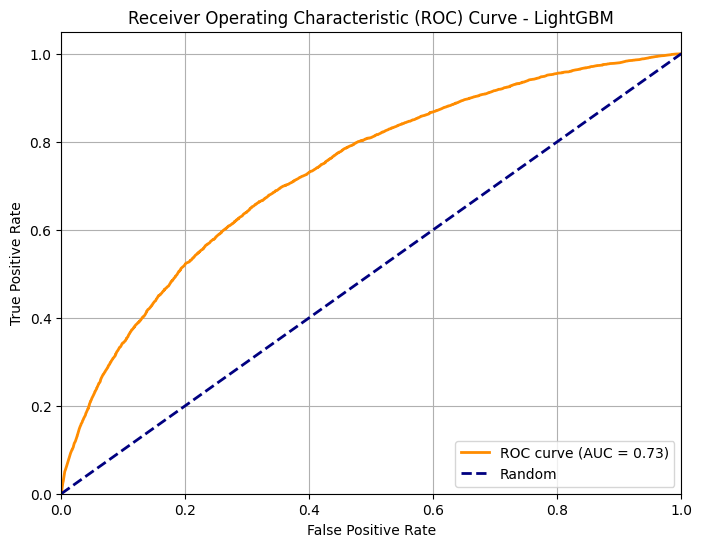

In [21]:
# ROC Curve visualization using main model
from sklearn.metrics import roc_curve, auc

# Get prediction probabilities for ROC curve using main model
y_pred_proba_viz = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_viz)
roc_auc_viz = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_viz:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - LightGBM')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

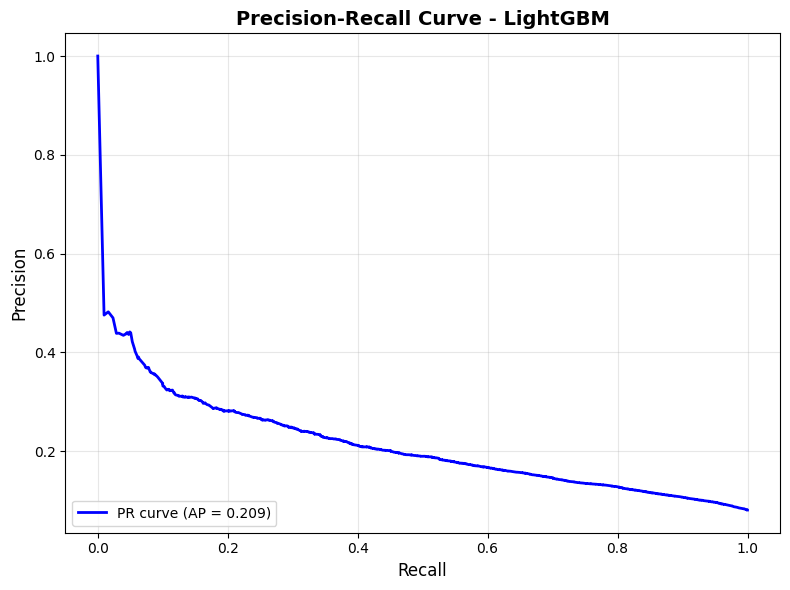

In [22]:
# Precision-Recall Curve
from sklearn.metrics import precision_recall_curve, average_precision_score

precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_proba)
avg_precision = average_precision_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall_curve, precision_curve, color='blue', lw=2, label=f'PR curve (AP = {avg_precision:.3f})')
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Precision-Recall Curve - LightGBM', fontsize=14, fontweight='bold')
plt.legend(loc="lower left")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

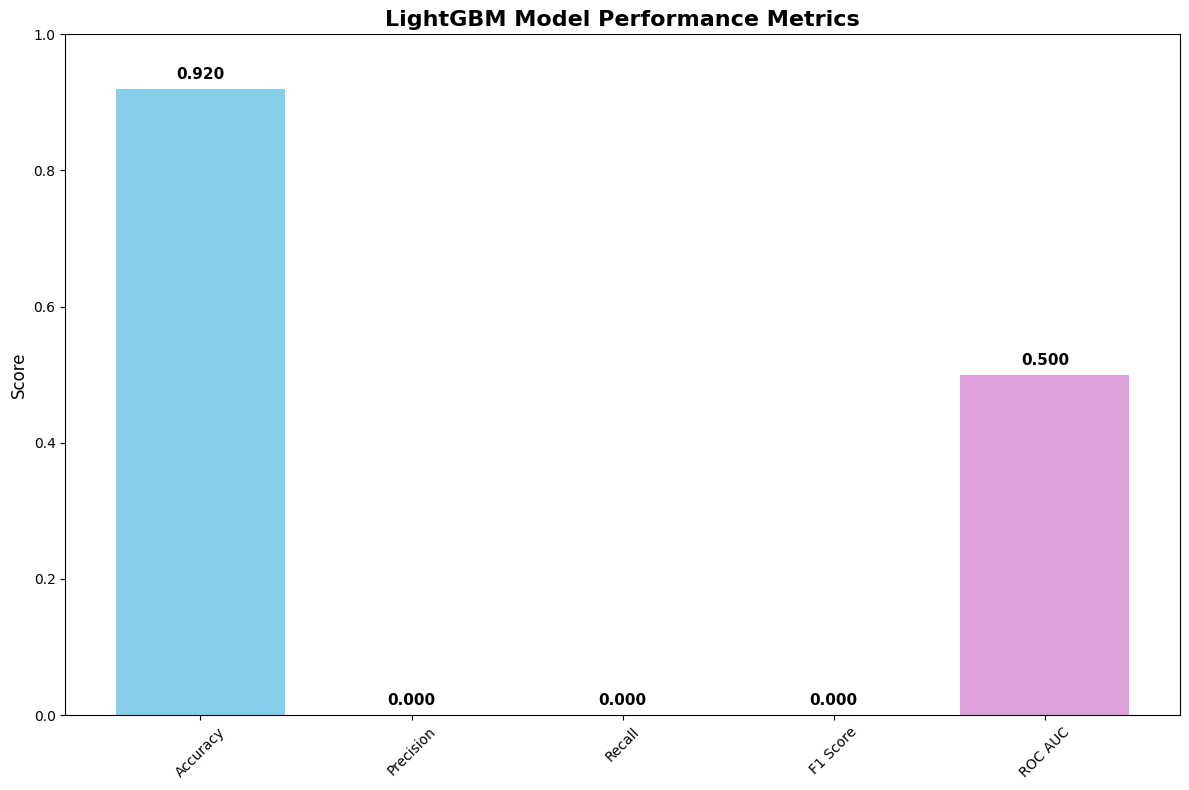


=== LIGHTGBM MODEL SUMMARY ===
Total Features Used: 166
Number of Estimators: 1200
Learning Rate: 0.02
Max Depth: -1
Training Set Size: 246008
Test Set Size: 61503

=== PERFORMANCE METRICS ===
Accuracy       : 0.9195
Precision      : 0.0000
Recall         : 0.0000
F1 Score       : 0.0000
ROC AUC        : 0.5000
Avg Precision   : 0.0805

=== MODEL PARAMETERS ===
Number of Boosting Rounds: 1200
Learning Rate: 0.02
Maximum Depth: -1
Number of Leaves: 64
Random State: 42


In [23]:
# Model Performance Metrics Visualization
metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'ROC AUC': roc_auc
}

plt.figure(figsize=(12, 8))
metric_names = list(metrics.keys())
metric_values = list(metrics.values())

bars = plt.bar(metric_names, metric_values, color=['skyblue', 'lightgreen', 'lightcoral', 'gold', 'plum'])
plt.title('LightGBM Model Performance Metrics', fontsize=16, fontweight='bold')
plt.ylabel('Score', fontsize=12)
plt.ylim(0, 1)

# Add value labels on bars
for bar, value in zip(bars, metric_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{value:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print summary statistics
print(f"\n=== LIGHTGBM MODEL SUMMARY ===")
print(f"Total Features Used: {len(X.columns)}")
print(f"Number of Estimators: {lgb_clf.n_estimators}")
print(f"Learning Rate: {lgb_clf.learning_rate}")
print(f"Max Depth: {lgb_clf.max_depth}")
print(f"Training Set Size: {len(X_train)}")
print(f"Test Set Size: {len(X_test)}")

print(f"\n=== PERFORMANCE METRICS ===")
for metric, value in metrics.items():
    print(f"{metric:<15}: {value:.4f}")
print(f"Avg Precision   : {average_precision:.4f}")

# Model parameters info
print(f"\n=== MODEL PARAMETERS ===")
print(f"Number of Boosting Rounds: {lgb_clf.n_estimators}")
print(f"Learning Rate: {lgb_clf.learning_rate}")
print(f"Maximum Depth: {lgb_clf.max_depth}")
print(f"Number of Leaves: {lgb_clf.num_leaves}")
print(f"Random State: {lgb_clf.random_state}")

In [24]:
# Create a more detailed model with evaluation tracking
lgb_detailed = lgb.LGBMClassifier(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42,
    verbose=-1  # Suppress output
)


In [25]:
# SHAP Analysis for Model Explainability

# Ensure shap is available (avoid duplicate import if later cells already imported it)
try:
    shap  # noqa: F821
except NameError:
    try:
        import shap  # type: ignore
    except ImportError:
        %pip install shap
        import shap  # type: ignore

# Create SHAP explainer for the trained model (model alias already created earlier)
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for the test set (using a sample for performance)
sample_size = min(100, len(X_test))
X_test_sample = X_test.iloc[:sample_size]
y_test_sample = y_test.iloc[:sample_size]

print(f"Computing SHAP values for {sample_size} test samples...")
shap_values = explainer.shap_values(X_test_sample)

print("SHAP values computed successfully!")
print(f"Type of shap_values: {type(shap_values)}")
try:
    print(f"SHAP values shape: {shap_values.shape}")
except AttributeError:
    print("SHAP values object has no shape attribute (possible list for multiclass).")
print(f"Base value: {explainer.expected_value}")
print(f"Sample features shape: {X_test_sample.shape}")

# Handle binary / multiclass / already 2D cases robustly
if isinstance(shap_values, list):
    # Assume binary or multiclass; take positive class if binary (index 1), else mean abs across classes
    if len(shap_values) == 2:
        shap_matrix = shap_values[1]
        base_value = explainer.expected_value[1] if hasattr(explainer.expected_value, '__len__') else explainer.expected_value
        print("Detected list SHAP output (binary); using index 1.")
    else:
        # Aggregate via mean absolute for multiclass >2
        shap_matrix = sum(np.abs(s) for s in shap_values) / len(shap_values)
        base_value = (explainer.expected_value[0]
                      if hasattr(explainer.expected_value, '__len__')
                      else explainer.expected_value)
        print(f"Detected multiclass ({len(shap_values)} classes); aggregated mean |SHAP|.")
else:
    # Numpy array path
    if getattr(shap_values, "ndim", None) == 3 and shap_values.shape[2] == 2:
        shap_matrix = shap_values[:, :, 1]
        base_value = explainer.expected_value[1]
        print(f"Using class 1 SHAP values with shape: {shap_matrix.shape}")
    elif getattr(shap_values, "ndim", None) == 2:
        shap_matrix = shap_values
        base_value = (explainer.expected_value if np.isscalar(explainer.expected_value)
                      else explainer.expected_value[0])
        print(f"Using 2D SHAP values with shape: {shap_matrix.shape}")
    else:
        # Fallback reshape
        shap_matrix = np.array(shap_values).reshape(len(shap_values), -1)
        base_value = (explainer.expected_value[0]
                      if hasattr(explainer.expected_value, '__len__')
                      else explainer.expected_value)
        print(f"Unexpected SHAP values shape; reshaped to {shap_matrix.shape}")

print(f"Base value (expected model output): {base_value:.4f}")

# Mean absolute SHAP importance
mean_shap_importance = np.abs(shap_matrix).mean(axis=0)

print(f"SHAP importance shape: {mean_shap_importance.shape}")
print(f"Number of features: {len(X_test_sample.columns)}")

if len(mean_shap_importance) == len(X_test_sample.columns):
    print("✓ Shapes match perfectly!")
else:
    print(f"⚠ Shape mismatch! SHAP: {len(mean_shap_importance)}, Features: {len(X_test_sample.columns)}")

feature_importance_shap = (
    pd.DataFrame({
        'feature': X_test_sample.columns,
        'shap_importance': mean_shap_importance
    })
    .sort_values('shap_importance', ascending=False)
)

print("\nTop 10 Most Important Features (SHAP-based):")
print(feature_importance_shap.head(10))

Computing SHAP values for 100 test samples...
SHAP values computed successfully!
Type of shap_values: <class 'numpy.ndarray'>
SHAP values shape: (100, 166)
Base value: -2.1682480827309853
Sample features shape: (100, 166)
Using 2D SHAP values with shape: (100, 166)
Base value (expected model output): -2.1682
SHAP importance shape: (166,)
Number of features: 166
✓ Shapes match perfectly!

Top 10 Most Important Features (SHAP-based):
                                 feature  shap_importance
28                          EXT_SOURCE_3         0.050169
27                          EXT_SOURCE_2         0.045434
85  NAME_EDUCATION_TYPE_Higher_education         0.019376
63                         CODE_GENDER_M         0.013997
7                             DAYS_BIRTH         0.012097
8                          DAYS_EMPLOYED         0.009971
5                        AMT_GOODS_PRICE         0.005255
3                             AMT_CREDIT         0.005094
10                       DAYS_ID_PUBLISH  

C:\Users\fabrizio natali\AppData\Roaming\Python\Python312\site-packages\shap\explainers\_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


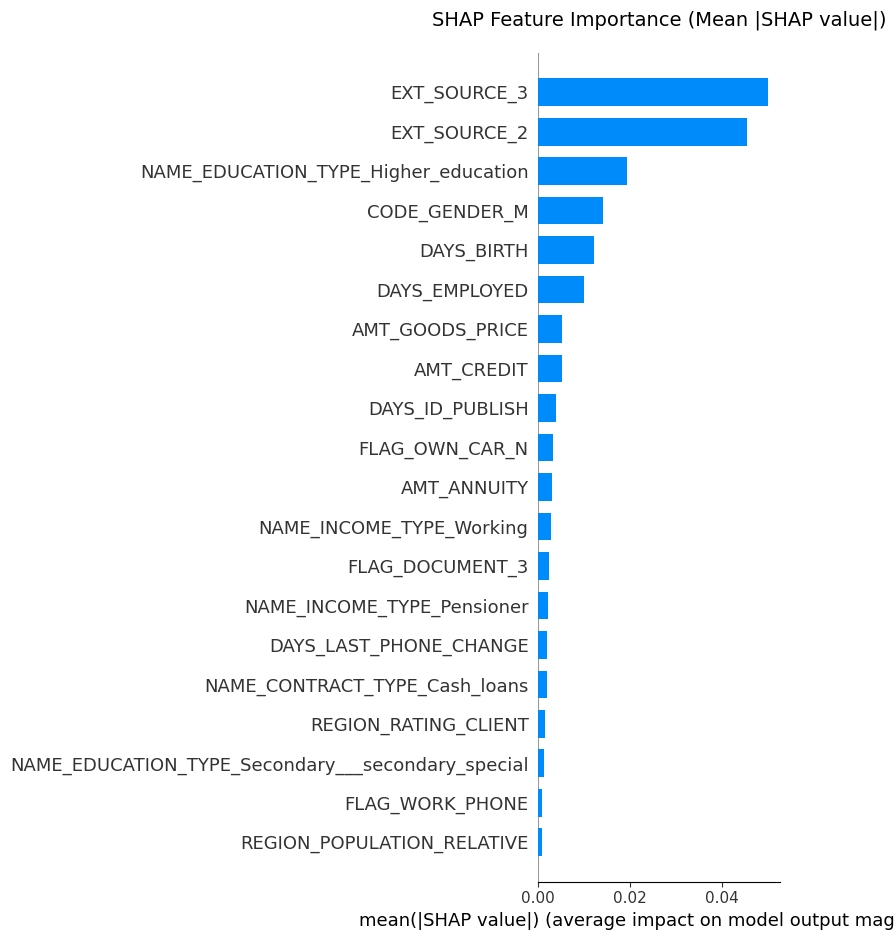

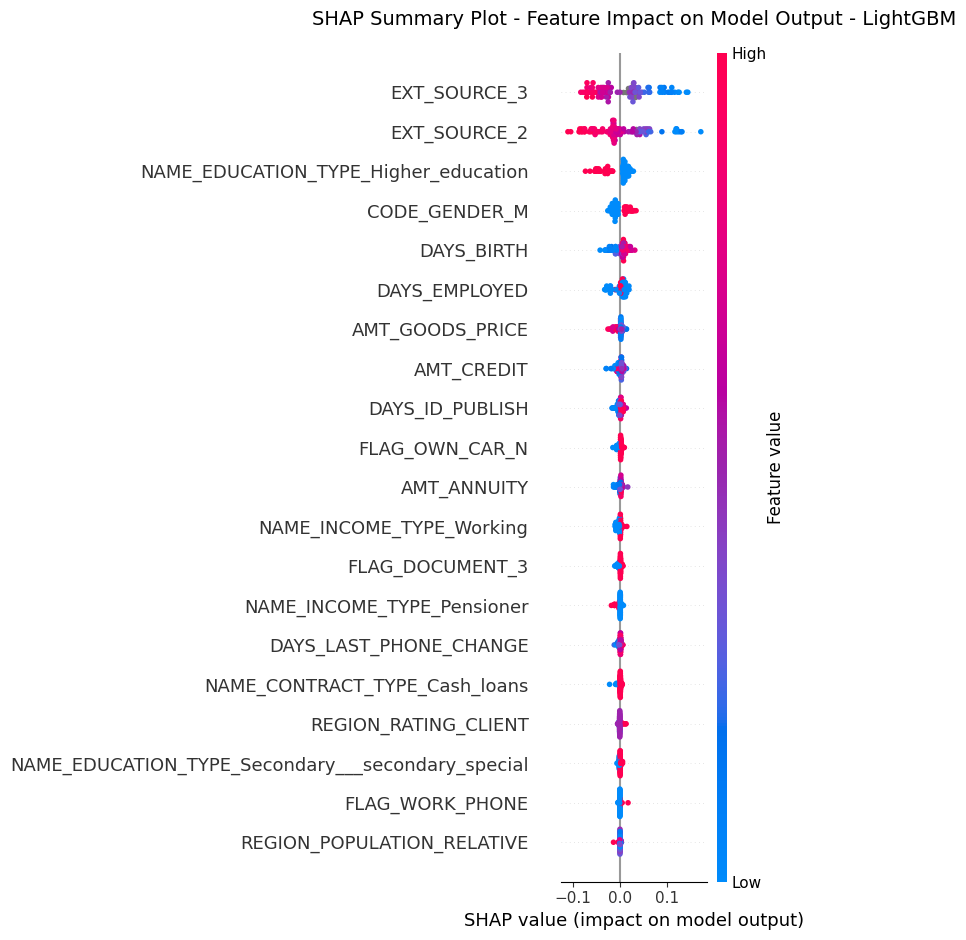

In [26]:
# SHAP Summary Plot - Shows feature importance and impact direction

# Resolve shap_values_to_use if not already defined
try:
	shap_values_to_use
except NameError:
	if 'shap_matrix' in globals():
		shap_values_to_use = shap_matrix
	elif 'shap_values' in globals():
		# If list (e.g., binary/multiclass), take positive class for binary, else mean |values|
		if isinstance(shap_values, list):
			if len(shap_values) == 2:  # binary
				shap_values_to_use = shap_values[1]
			else:  # multiclass > 2
				shap_values_to_use = sum(np.abs(s) for s in shap_values) / len(shap_values)
		else:
			shap_values_to_use = shap_values
	else:
		raise NameError("No SHAP values available. Run the SHAP computation cell first (cell 24).")

# Ensure feature frame matches SHAP value row count
if hasattr(shap_values_to_use, "shape") and 'X_test_sample' in globals():
	if shap_values_to_use.shape[0] != len(X_test_sample):
		# Realign X_test_sample to SHAP matrix rows if shapes differ
		if 'X_test' in globals():
			X_test_sample = X_test.iloc[:shap_values_to_use.shape[0]]
		else:
			raise ValueError("Mismatch between SHAP values and X_test_sample rows, and X_test not available for realignment.")

plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values_to_use, X_test_sample, plot_type="bar", show=False)
plt.title('SHAP Feature Importance (Mean |SHAP value|)', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

# SHAP Summary Plot with feature values (beeswarm)
plt.figure(figsize=(12, 10))
shap.summary_plot(shap_values_to_use, X_test_sample, show=False)
plt.title('SHAP Summary Plot - Feature Impact on Model Output - LightGBM', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

[Info] Reusing existing X_test_sample (n=100).
[Info] Using previously computed shap_values_to_use.

=== SAMPLE 1 (Row 0) ===
Actual label: 0
Predicted probability (class 1): 0.1197


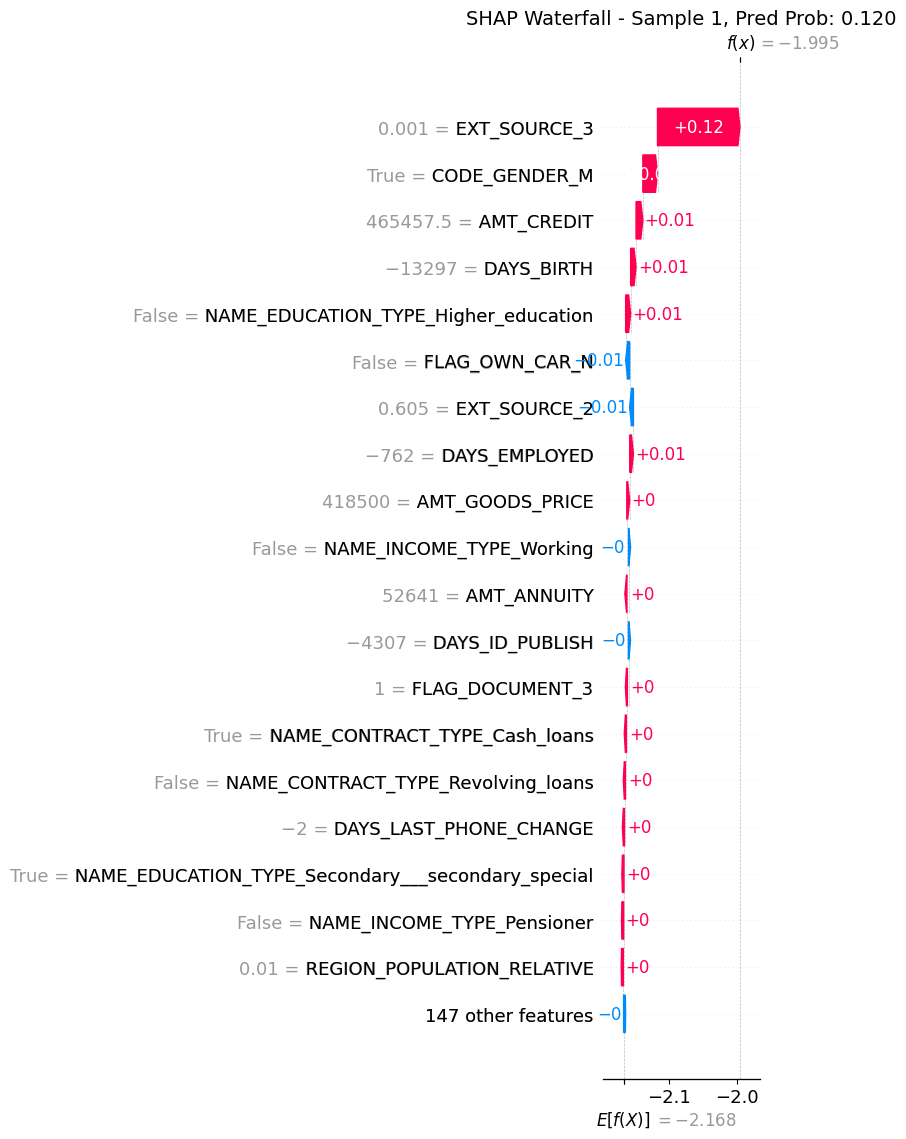


=== SAMPLE 2 (Row 1) ===
Actual label: 0
Predicted probability (class 1): 0.0953


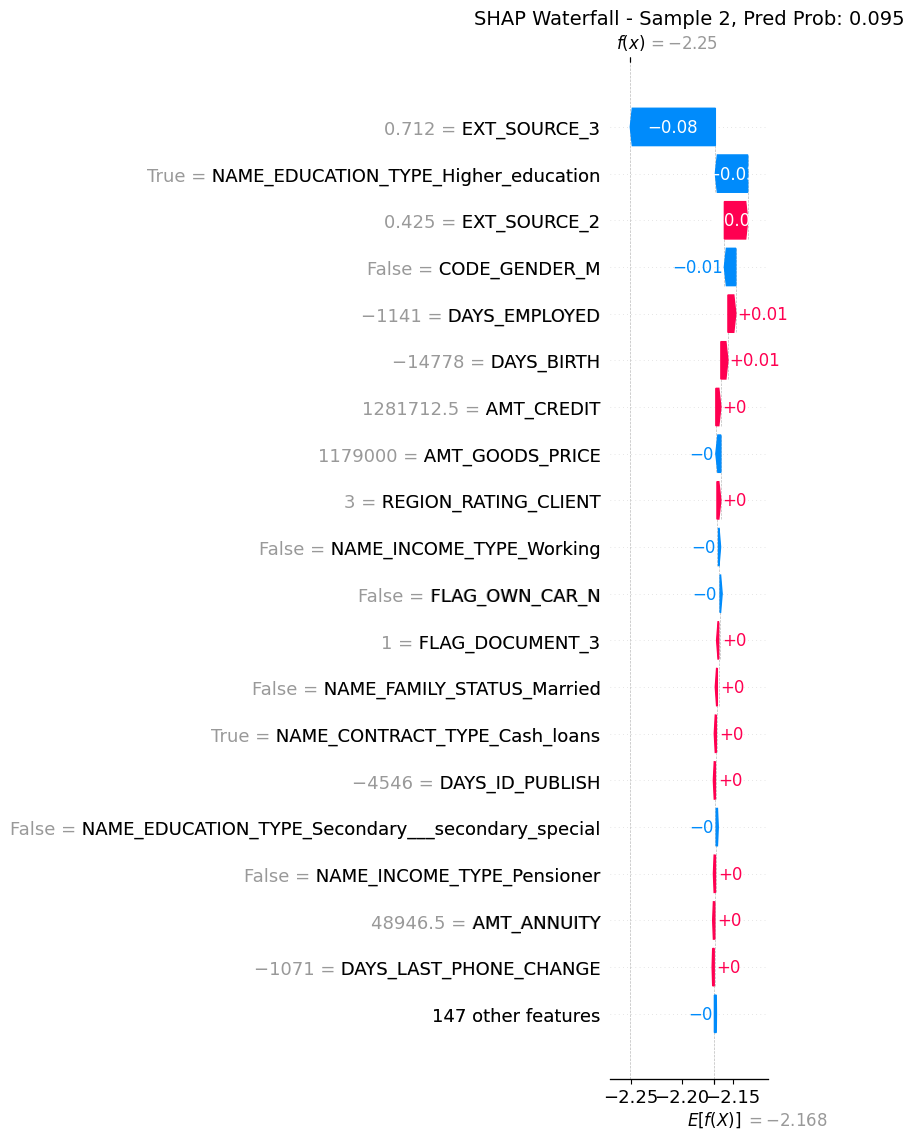


=== SAMPLE 3 (Row 2) ===
Actual label: 0
Predicted probability (class 1): 0.1156


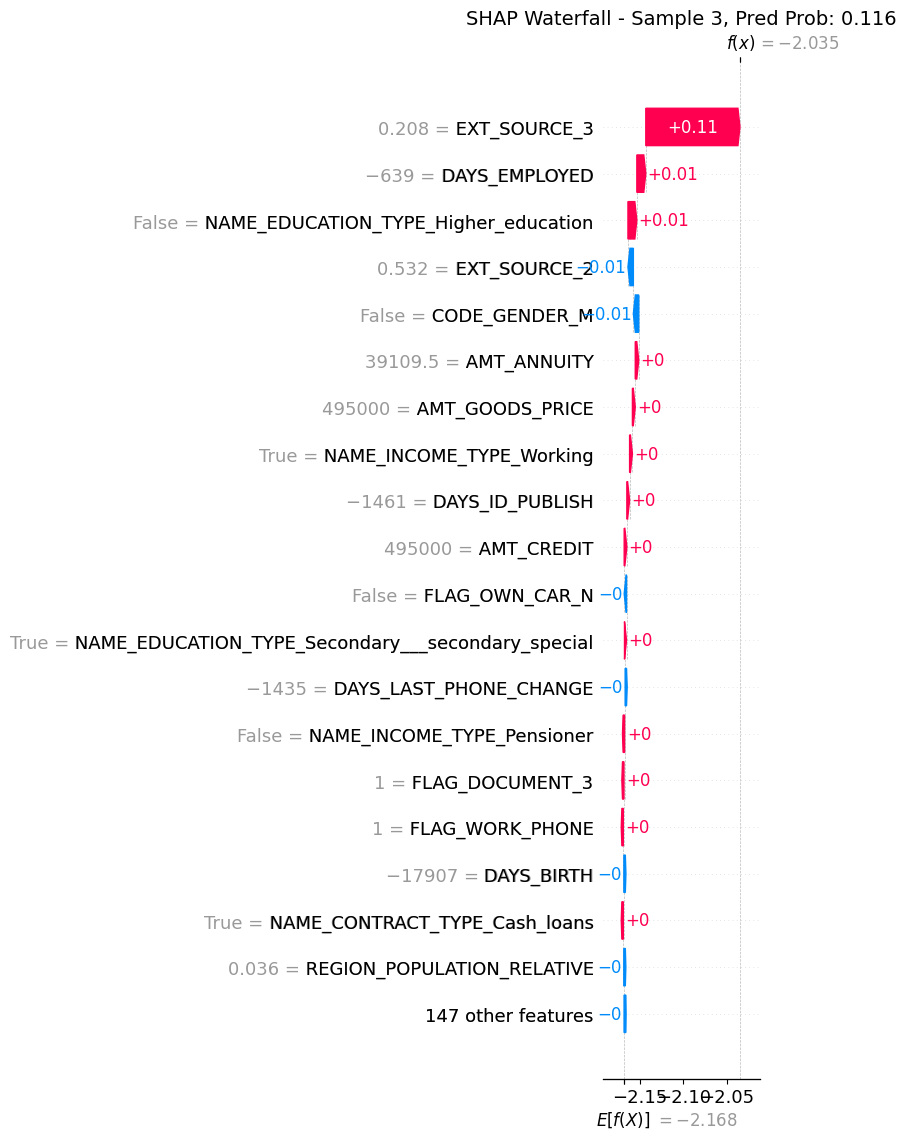


[Done] Robust SHAP waterfall explanations generated.


In [27]:
# SHAP Waterfall Plot - Explain individual predictions (robust version)
# This cell is now self-contained. It will:
#  - Recreate a SHAP sample if prior SHAP cell wasn't run.
#  - Define y_test_sample / X_test_sample if missing.
#  - Compute shap_values_to_use if absent.
#  - Fall back gracefully if SHAP not installed.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Ensure model alias exists
try:
    model
except NameError:
    try:
        model = lgb_clf
        print('[Info] Created model alias from lgb_clf.')
    except NameError:
        raise RuntimeError('No trained model found (lgb_clf/model). Train the LightGBM model first.')

# 2. Ensure SHAP availability
try:
    import shap  # noqa: F401
except ImportError:
    print('[Warn] shap not installed. Install with: pip install shap')
    raise

# 3. Build / reuse sample slice
DEFAULT_SAMPLE_SIZE = 100
if 'X_test_sample' not in globals() or 'y_test_sample' not in globals():
    if 'X_test' not in globals() or 'y_test' not in globals():
        raise RuntimeError('X_test / y_test not available. Run data split & model training cells first.')
    sample_size = min(DEFAULT_SAMPLE_SIZE, len(X_test))
    X_test_sample = X_test.iloc[:sample_size].copy()
    y_test_sample = y_test.iloc[:sample_size].copy()
    print(f'[Info] Generated new X_test_sample / y_test_sample of size {sample_size}.')
else:
    # Keep existing but note size
    sample_size = len(X_test_sample)
    print(f'[Info] Reusing existing X_test_sample (n={sample_size}).')

# 4. Compute SHAP values if needed
need_shap_matrix = False
if 'shap_values_to_use' not in globals():
    need_shap_matrix = True
if 'base_value' not in globals():
    need_shap_matrix = True

if need_shap_matrix:
    print('[Info] Computing SHAP values (fresh)...')
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_test_sample)

    # Handle binary/multiclass/list outputs
    if isinstance(shap_values, list):
        if len(shap_values) == 2:  # binary
            shap_matrix = shap_values[1]
            base_value = explainer.expected_value[1] if hasattr(explainer.expected_value, '__len__') else explainer.expected_value
            print('[Info] Binary classification SHAP list detected; using index 1.')
        else:
            shap_matrix = sum(np.abs(s) for s in shap_values) / len(shap_values)
            base_value = explainer.expected_value[0] if hasattr(explainer.expected_value, '__len__') else explainer.expected_value
            print(f'[Info] Multiclass ({len(shap_values)} classes) aggregated mean |SHAP|.')
    else:
        if getattr(shap_values, 'ndim', None) == 3 and shap_values.shape[2] == 2:  # (n, f, 2)
            shap_matrix = shap_values[:, :, 1]
            base_value = explainer.expected_value[1]
            print('[Info] 3D SHAP array (binary) -> using class 1 slice.')
        elif getattr(shap_values, 'ndim', None) == 2:
            shap_matrix = shap_values
            base_value = explainer.expected_value if np.isscalar(explainer.expected_value) else explainer.expected_value[0]
            print('[Info] 2D SHAP array used directly.')
        else:
            shap_matrix = np.array(shap_values).reshape(len(shap_values), -1)
            base_value = explainer.expected_value[0] if hasattr(explainer.expected_value, '__len__') else explainer.expected_value
            print(f'[Warn] Unexpected SHAP shape; reshaped to {shap_matrix.shape}.')

    shap_values_to_use = shap_matrix
else:
    print('[Info] Using previously computed shap_values_to_use.')

# 5. Validate alignment
if shap_values_to_use.shape[0] != len(X_test_sample):
    print(f'[Warn] Row mismatch: SHAP rows={shap_values_to_use.shape[0]} vs sample rows={len(X_test_sample)}; truncating to smallest.')
    r = min(shap_values_to_use.shape[0], len(X_test_sample))
    shap_values_to_use = shap_values_to_use[:r]
    X_test_sample = X_test_sample.iloc[:r]
    y_test_sample = y_test_sample.iloc[:r]

# 6. Prepare sample indices for waterfall
sample_indices = [0, 1, 2]
valid_indices = [i for i in sample_indices if i < shap_values_to_use.shape[0]]
if len(valid_indices) < len(sample_indices):
    print(f'[Info] Some requested indices exceed sample size {shap_values_to_use.shape[0]}; using {valid_indices}.')

# 7. Ensure probability predictions for annotation
try:
    sample_pred_proba = model.predict_proba(X_test_sample)[:, 1]
except Exception:
    sample_pred_proba = None
    print('[Warn] Could not compute predict_proba; waterfall will omit predicted probability.')

# 8. Generate waterfall plots
for display_rank, idx in enumerate(valid_indices, start=1):
    actual_label = y_test_sample.iloc[idx]
    predicted_prob = sample_pred_proba[idx] if sample_pred_proba is not None else float('nan')
    print(f"\n=== SAMPLE {display_rank} (Row {idx}) ===")
    print(f"Actual label: {actual_label}")
    if sample_pred_proba is not None:
        print(f"Predicted probability (class 1): {predicted_prob:.4f}")

    plt.figure(figsize=(11, 7))
    shap.waterfall_plot(
        shap.Explanation(
            values=shap_values_to_use[idx],
            base_values=base_value,
            data=X_test_sample.iloc[idx],
            feature_names=X_test_sample.columns.tolist()
        ),
        max_display=20,
        show=False
    )
    title_prob = f", Pred Prob: {predicted_prob:.3f}" if sample_pred_proba is not None else ''
    plt.title(f'SHAP Waterfall - Sample {display_rank}{title_prob}', fontsize=14)
    plt.tight_layout()
    plt.show()

print('\n[Done] Robust SHAP waterfall explanations generated.')